# DSCI 521: Data Analysis and Interpretation <br> Term Final Project Implementation: Comcast Stock Analysis & Prediction


## Introduction

##### Software Pre-requisites:
- `pip install finnhub-python`
- `pip install matplotlib`
- `pip install pandas`
- `pip install seaborn`
- `pip install numpy`
- `pip install scikit-learn`


#### How our analysis might fit into an application or investigation

Since we will be analysing Comcast stock to gather insight, we can leverage our findings into our own personal application or investiagation of the stock market by looking for key indicators for buying/selling other stocks, such as competitors, for personal usage. 

#### How our analysis is limited and could be improved

We can only rely on publically availible information which was gathered for free, as such the data set is limited in information compared to pay-to-access options. Since we opted for a free option we only have a years worth of Comcast stock information for our analysis. Additionally, there are several other factors our dataset does not capture in external market factors such as inflation, product launches, industry performance etc. 

#### Who might be interested in our analysis

Stock analysis helps traders to gain an insight into the economy, stock market, or securities. It involves studying the past and present market data and creating a methodology to choose appropriate stocks for trading. Stock analysis also includes the identification of ways of entry into and exit from the investments. Investors or traders make buying or selling decisions based on stock analysis information

#### Selection of data and tooling used for analysis

- FinnHub is the source of the dataset being used for analytics.
- The dataset contains real-time and historical data about the company fundamentals including financial reports, stock price and market sentiments.
- The dataset is an ideal starting point for the long-term stock price prediction or future growth prospects.
- For visualization we worked with Pandas, Matplotlib & Seaborn. 
- As part of this project we worked with Python ML related packages such as Scikit-learn and NumPy to generate forecasting.



#### Dataset
We utilized the dataset we created from our previous DSCI 511 pre-processing class to conduct our analysis.

Our data store is available to view in Google Drive: https://drive.google.com/drive/folders/1hgWRHwlC9thoPKd7-dRqEHTPGYv3LtUk

It contains data from Comcast, its competitors and other top companies within the stock market. We will focus primarily on Comcast (CMCSA stock ticker). We used Finnhub (https://finnhub.io/docs/api/introduction) as the source of our data. Below is a list of the data we generated for analysis:


- Candlestick Data: Daily candlestick data (OHLCV) for stocks.
> candlestick_data.csv

- Company Surprise Earnings: Historical quarterly earnings containing expected and actual earnings
> surprise_earnings.csv

- Recommendation Trends: The latest analyst recommendation trends for a company.
> recommendation_trends.csv

- Insider Sentiment: Insider sentiment for companies using the Monthly Share Purchase Ratio (MSPR). To give investors a glimpse at what the executives are thinking about the stock price and valuation in the near future.
> insider_sentiment.csv

- Insider Transactions: Insider transactions data sourced from Form 3,4,5, SEDI and relevant companies' filings.
> insider_transactions.csv

- Social Media Sentiment: Social sentiment for stocks on Reddit and Twitter.
> social_media_sentiment.csv

- Technical indicators: Stock technical indicator data with price data.
> technical_indicators.csv


#### Project Goal
- The goal of our project is to use the financial data and predict the stock price for CMCSA for the next few days using the python ML Library. We will be using some of the following models for predicting the stock price: Linear Regression, Random Forest Regressor and Decision Tree Regression. The goal is to predict the stock price using the model that provides the best score as well as provide a comparative analysis of different models for the problem at hand. 


#### Individual contributions
- Geoff Patton is a software engineer. - Worked on different ML Algorithms using scikit learn for comparative analysis for the stock prices. Participated in team discussions regarding design and strategy.

- Ananda Mahalingam is a Software Engineer.- Worked on modeling the future stock price prediction for CMCSA. Experimented with different algorithms before settling on the appropriate one. Participated in team discussions regarding design and strategy.

- Fengtian Lu is a Software Engineer. - Analyze different ML Algorithms using scikit Learn for comparative study. Participated in team discussions regarding design and strategy.

- Rohit Bhattacharya is an IT analyst. - Worked on EDAs and modeling the future stock price prediction for CMCSA. Participated in team discussions regarding design and strategy.

All members worked on conducting EDA on our exisiting dataset to determine which features to use in our analysis. 

## Exploritory Data Analysis (EDA)



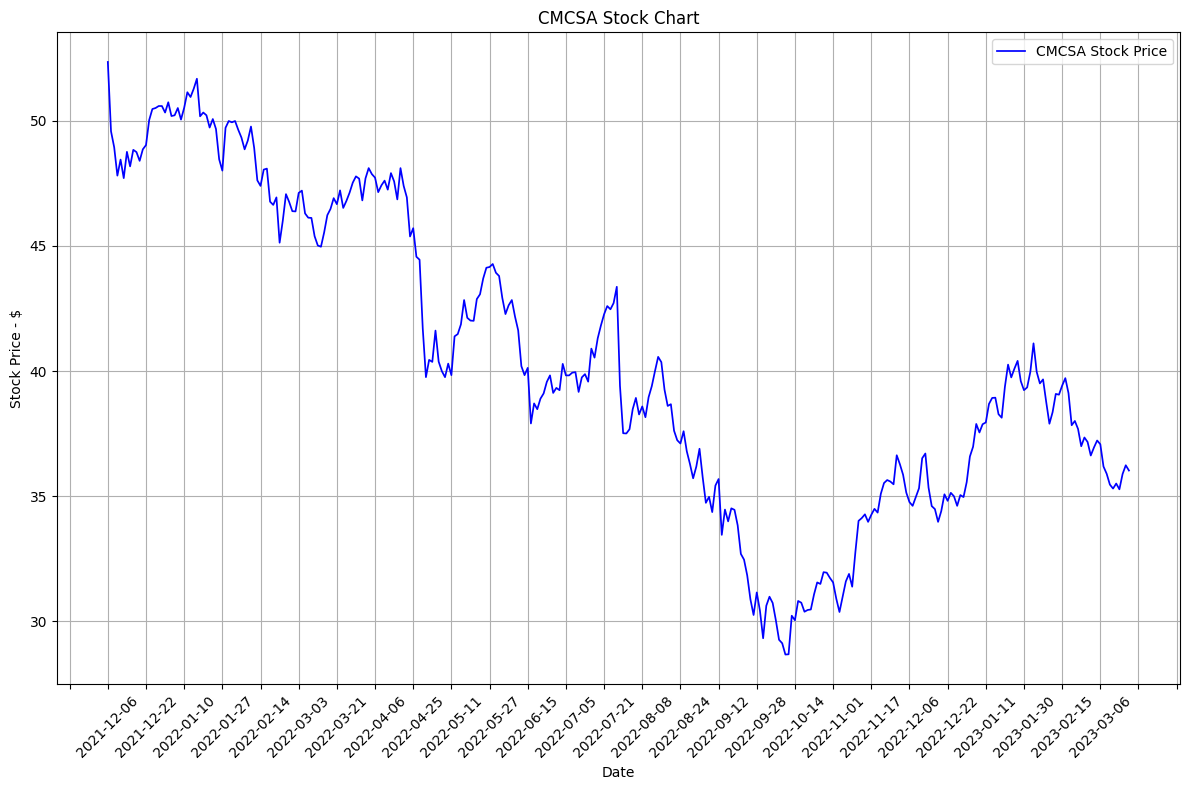

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sb

ticker_symbol = 'CMCSA'
candle_csv_file_path = './data/candlestick_data.csv'

all_stock_df = pd.read_csv(candle_csv_file_path, header = 0).sort_values(by=['unix_time'])

company_stock_data_df = all_stock_df[all_stock_df['symbol'] == ticker_symbol]

plt.figure(figsize=(12,8),dpi=100)
ax = plt.axes()
ax.grid()
ax.set(xlabel='Date', ylabel='Stock Price - $', title=ticker_symbol + ' Stock Chart')

ax.plot(company_stock_data_df['date'], company_stock_data_df['close'], c='b', label=ticker_symbol + ' Stock Price', linewidth=1.25)

ax.xaxis.set_major_locator(mticker. MultipleLocator(12))

for tick in ax.get_xticklabels():
    tick.set_rotation(45)

plt.tight_layout()
plt.legend()
plt.show()


In [147]:
print(company_stock_data_df.info())
print(company_stock_data_df.shape,"\n\nNull Check:")
print(company_stock_data_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 3814 to 3493
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   symbol     322 non-null    object 
 1   date       322 non-null    object 
 2   unix_time  322 non-null    int64  
 3   open       322 non-null    float64
 4   close      322 non-null    float64
 5   high       322 non-null    float64
 6   low        322 non-null    float64
 7   volume     322 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 22.6+ KB
None
(322, 8) 

Null Check:
symbol       0
date         0
unix_time    0
open         0
close        0
high         0
low          0
volume       0
dtype: int64


In [148]:
print(company_stock_data_df.describe())

          unix_time        open       close        high         low  \
count  3.220000e+02  322.000000  322.000000  322.000000  322.000000   
mean   1.658861e+09   40.495318   40.489161   41.000352   40.003655   
std    1.169302e+07    6.076731    6.086433    6.147656    6.041768   
min    1.638749e+09   28.672000   28.680000   29.150000   28.390000   
25%    1.648706e+09   35.557500   35.660000   36.051250   35.268750   
50%    1.658923e+09   39.435000   39.695000   40.075000   39.080000   
75%    1.668708e+09   46.747500   46.610000   47.137500   46.058750   
max    1.679011e+09   52.300000   52.350000   53.315000   52.060000   

             volume  
count  3.220000e+02  
mean   2.394254e+07  
std    8.168671e+06  
min    9.285440e+06  
25%    1.815742e+07  
50%    2.216243e+07  
75%    2.834302e+07  
max    6.886219e+07  


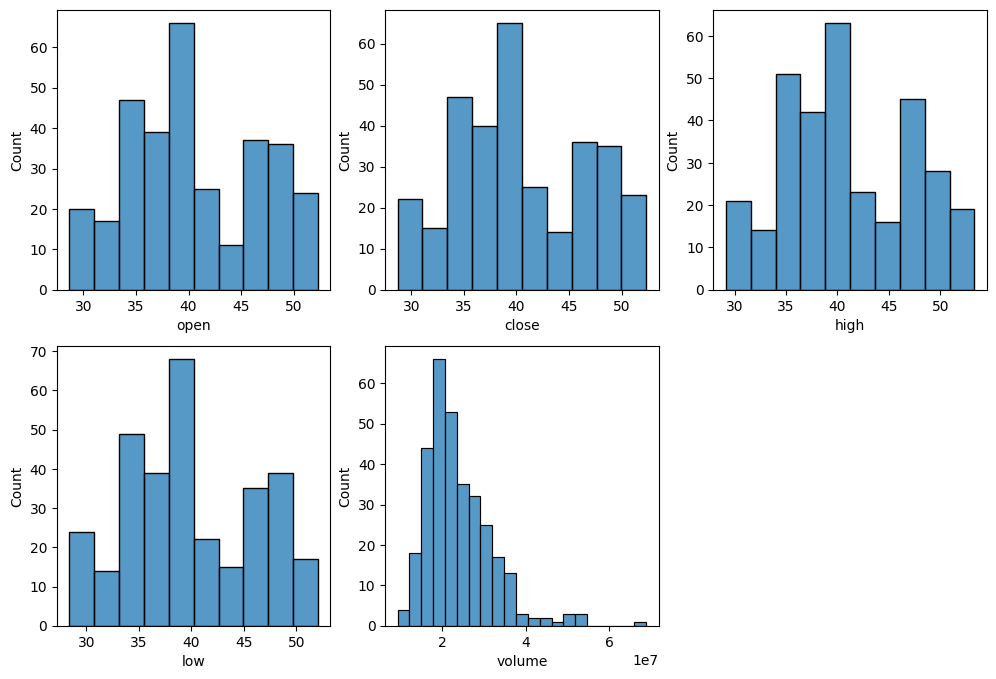

In [149]:
features = ['open', 'close', 'high', 'low', 'volume']
 
plt.figure(figsize=(12,8),dpi=100)
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.histplot(company_stock_data_df[col])
plt.show()

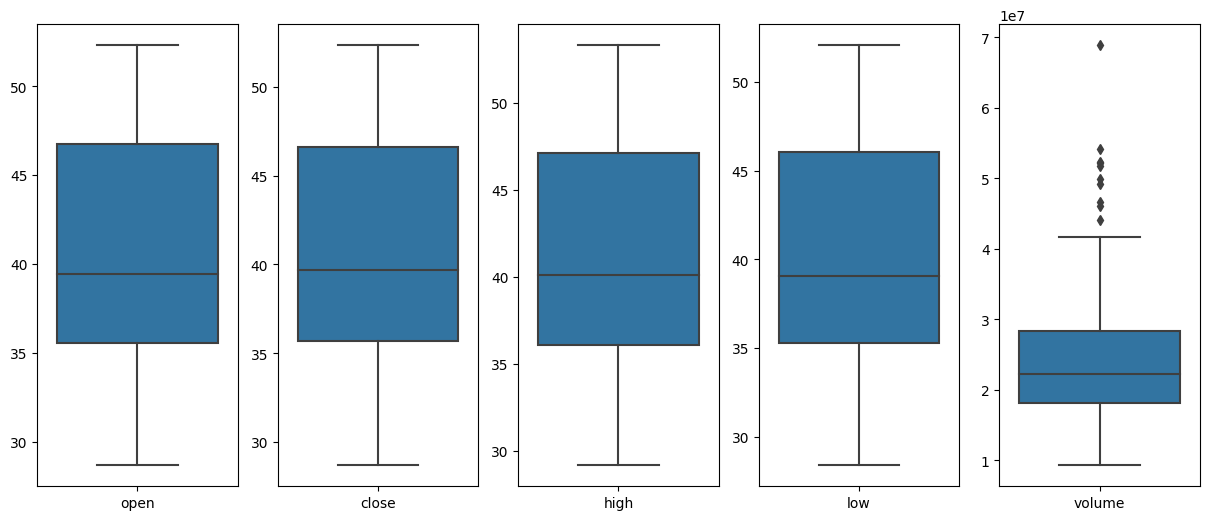

In [150]:

plt.figure(figsize=(15,6),dpi=100)
for i, col in enumerate(features):
  plt.subplot(1,5,i+1)
  sb.boxplot(company_stock_data_df[[col]])
plt.show()

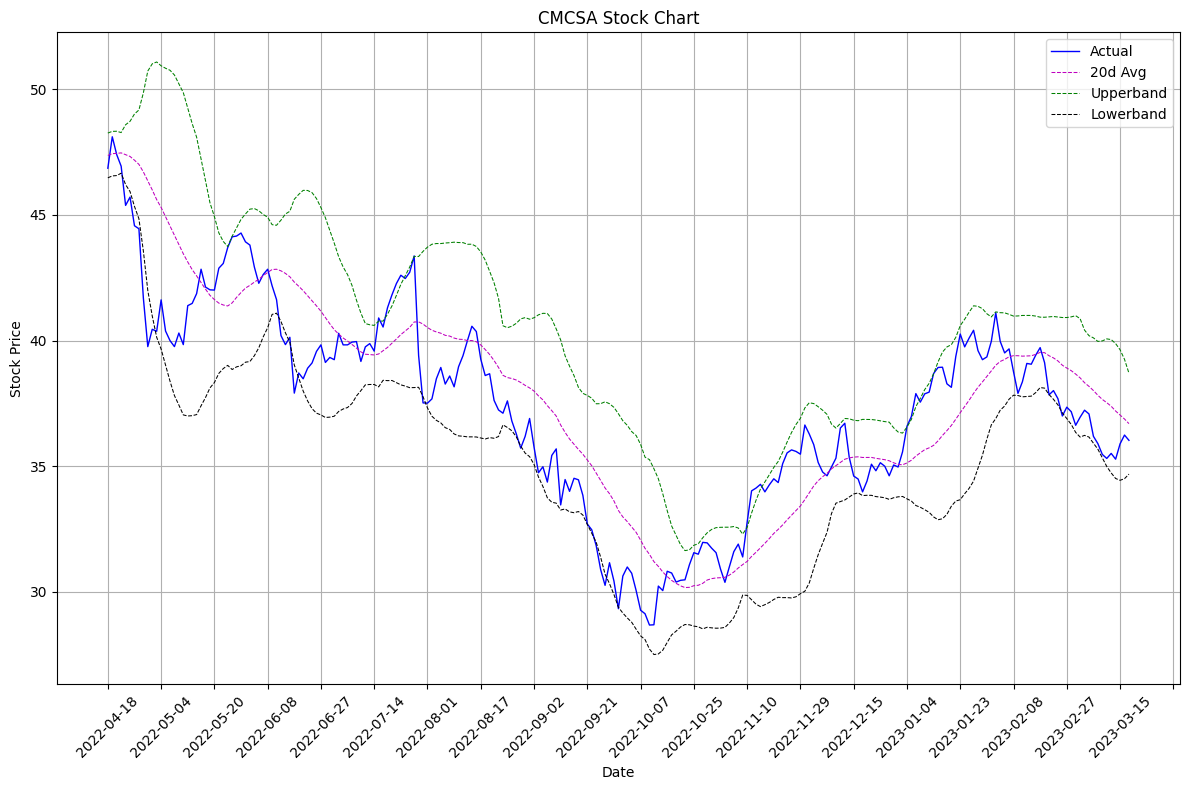

In [151]:
### Technical Indicators
ticker_symbol = 'CMCSA'
tech_indicators_csv_file_path = './data/technical_indicators.csv'

all_stock_df = pd.read_csv(tech_indicators_csv_file_path, header = 0)

stock_technical_df = all_stock_df[all_stock_df['symbol'] == ticker_symbol].drop('symbol', axis = 1).sort_values(by=['unix_time'])

plt.figure(figsize=(12,8),dpi=100)
ax = plt.axes()
ax.grid()
ax.set(xlabel='Date', ylabel='Stock Price', title=ticker_symbol + ' Stock Chart')

ax.plot(stock_technical_df['date'], stock_technical_df['close'], label='Actual', c='b', linewidth=1)
ax.plot(stock_technical_df['date'], stock_technical_df['middleband'], label='20d Avg', c='m', linewidth=.75, linestyle = 'dashed')
ax.plot(stock_technical_df['date'], stock_technical_df['upperband'], label='Upperband', c='g', linewidth=.75, linestyle = 'dashed')
ax.plot(stock_technical_df['date'], stock_technical_df['lowerband'], label='Lowerband', c='k', linewidth=.75, linestyle = 'dashed')

ax.xaxis.set_major_locator(mticker. MultipleLocator(12))

for tick in ax.get_xticklabels():
    tick.set_rotation(45)

plt.tight_layout()
plt.legend()
plt.show()

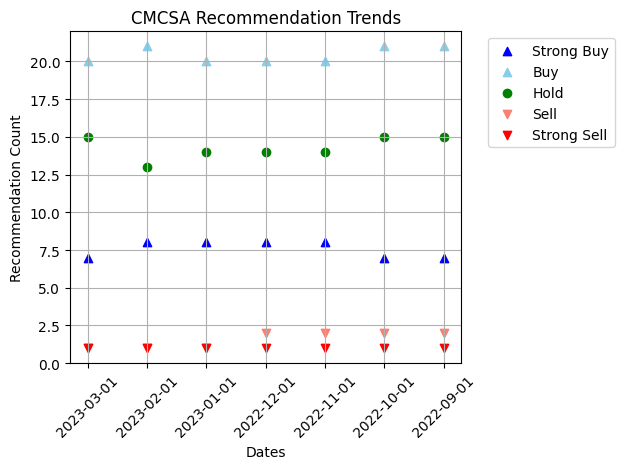

In [152]:
# Additional Financial Data

ticker_symbol = 'CMCSA'
trends_csv = './data/recommendation_trends.csv'

all_trends_df = pd.read_csv(trends_csv, header = 0)
stock_trends_df = all_trends_df[all_trends_df['symbol'] == ticker_symbol].copy()

ax = plt.axes()
ax.grid()
ax.set(xlabel='Dates', ylabel='Recommendation Count')

ax.scatter(stock_trends_df['period'], stock_trends_df['strongBuy'], label='Strong Buy', c='b', marker="^")
ax.scatter(stock_trends_df['period'], stock_trends_df['buy'], label='Buy', c='skyblue', marker="^")
ax.scatter(stock_trends_df['period'], stock_trends_df['hold'], label='Hold', c='g')
ax.scatter(stock_trends_df['period'], stock_trends_df['sell'], label='Sell', c='salmon', marker="v")
ax.scatter(stock_trends_df['period'], stock_trends_df['strongSell'], label='Strong Sell', c='r', marker="v")

ax.set_title(ticker_symbol + " Recommendation Trends")

for tick in ax.get_xticklabels():
        tick.set_rotation(45)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

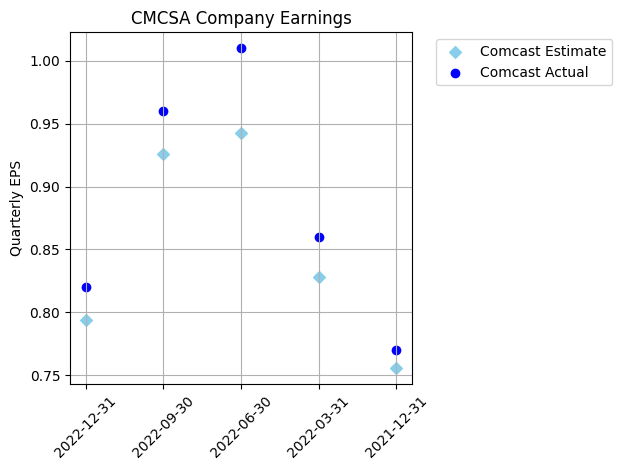

In [153]:
ticker_symbol = 'CMCSA'
earnings_csv = './data/surprise_earnings.csv'

all_earnings_df = pd.read_csv(earnings_csv, header = 0)
stock_earnings_df = all_earnings_df[all_earnings_df['symbol'] == ticker_symbol].copy()

ax = plt.axes()
ax.grid()

ax.scatter(stock_earnings_df['period'], stock_earnings_df['estimate'], label='Comcast Estimate', c='skyblue',  marker="D")
ax.scatter(stock_earnings_df['period'], stock_earnings_df['actual'], label='Comcast Actual', c='b')

ax.set_title(ticker_symbol + " Company Earnings")
ax.set_ylabel("Quarterly EPS")

for tick in ax.get_xticklabels():
    tick.set_rotation(45)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

## Modelling and Prediction

Random Forest Model score: 0.8778185840548315


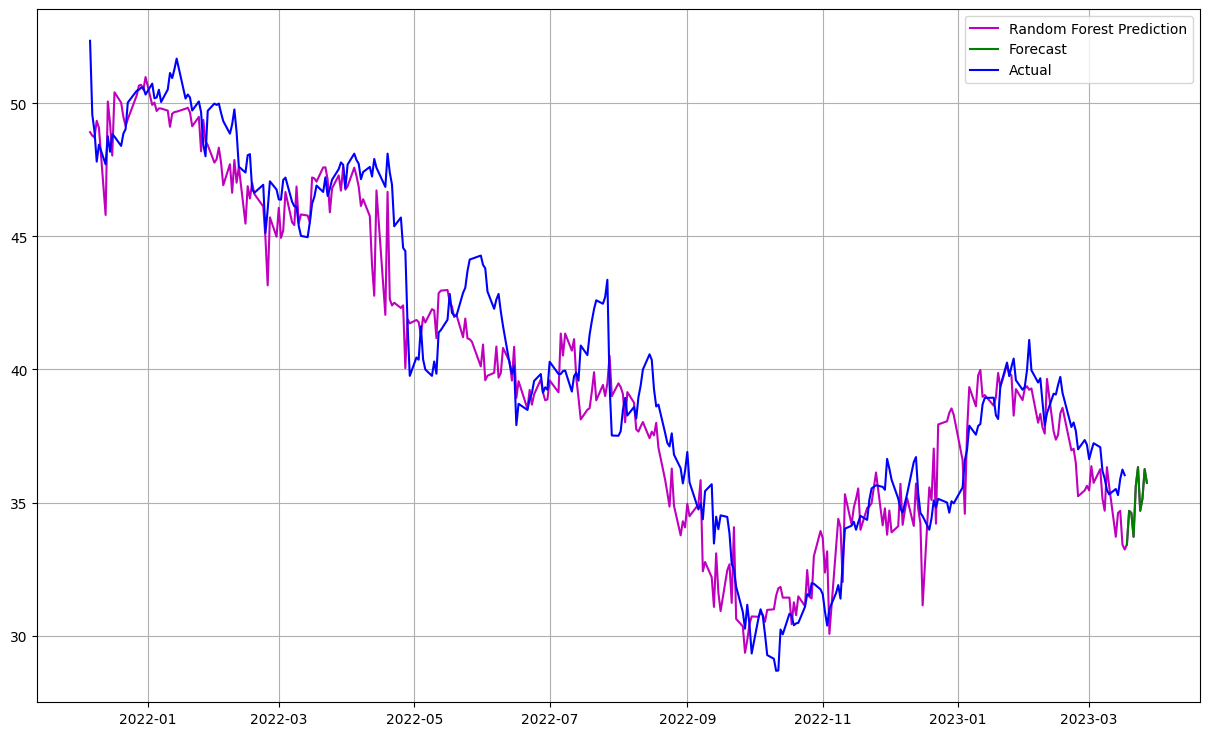

In [154]:
# Decision Tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from datetime import date, datetime, timedelta

predict_days = 10

comcast_forest_regressor_df = company_stock_data_df.copy()

comcast_forest_regressor_df['prediction'] = comcast_forest_regressor_df['close'].shift(-predict_days)

comcast_forest_regressor_df['date'] = pd.to_datetime(comcast_forest_regressor_df['date'])
comcast_forest_regressor_df.index = comcast_forest_regressor_df['date']
comcast_forest_regressor_df = pd.DataFrame(comcast_forest_regressor_df.iloc[:,-5:])

comcast_forest_regressor_df = comcast_forest_regressor_df.sort_values(by='date')

next_date = comcast_forest_regressor_df.index.max()
prev_date = comcast_forest_regressor_df.index.max()
current_date = next_date
display_at = next_date
alpha = 0.5

for i in range(predict_days):   
    next_date += timedelta(days=1)
    prev_date -= timedelta(days=1)
    while (prev_date not in comcast_forest_regressor_df.index.values):
        prev_date -= timedelta(days=1)
    comcast_forest_regressor_df.loc[next_date] = comcast_forest_regressor_df.loc[prev_date]
    comcast_forest_regressor_df.loc[next_date]['open'] = comcast_forest_regressor_df.loc[current_date]['close']
    comcast_forest_regressor_df.loc[next_date]['prediction'] = np.nan
    current_date = next_date


X = np.array(comcast_forest_regressor_df.drop('prediction', axis = 1))
X = X[:-predict_days*2] 

y = np.array(comcast_forest_regressor_df['prediction'])
y = y[:-predict_days*2] 


X_train, X_test, y_train_labels, y_test_labels = train_test_split(X,  y, train_size=0.75, test_size=0.25, random_state=0)

forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train_labels)

forest_model_score = forest_model.score(X_test, y_test_labels)
print('Random Forest Model score:', forest_model_score)

X_predict = np.array(comcast_forest_regressor_df.drop('prediction', axis=1))[-predict_days:]

linear_model_predict_prediction = forest_model.predict(X_predict)
linear_model_real_prediction = forest_model.predict(np.array(comcast_forest_regressor_df.drop('prediction', axis=1)))

predicted_dates = []
recent_date = comcast_forest_regressor_df.index.max()
display_at = recent_date

for i in range(predict_days):   
    recent_date += timedelta(days=1)
    predicted_dates.append(recent_date)


plt.figure(figsize=(15, 9))
plt.plot(comcast_forest_regressor_df.index[0:], linear_model_real_prediction[0:], label='Random Forest Prediction', color='m')
plt.plot(comcast_forest_regressor_df.index[-predict_days:], linear_model_predict_prediction, label='Forecast', color='green')
plt.plot(comcast_forest_regressor_df.index[0:-predict_days], comcast_forest_regressor_df['close'][0:-predict_days], label='Actual', color='b')
plt.legend()
plt.grid()
plt.show()

In [155]:
# Support Methods to plot graphs and calculate metrics

from sklearn.metrics import r2_score, max_error, mean_squared_error, mean_absolute_error

def plot_graph(stock_df, test_x, test_y, prediction_y, model_name):
    plt.figure(figsize=(12,8),dpi=100)
    ax = plt.axes()
    ax.grid()
    ax.set(xlabel='Date', ylabel='Stock Price', title=model_name)

    ax.plot(stock_df.index, stock_df['close'], label='actual', c='b', linewidth=1)
    ax.plot(test_x.index, test_y, label='test', c='r', linewidth=1)
    ax.plot(test_x.index, prediction_y, label='prediction', c='g', linewidth=1)

    ax.xaxis.set_major_locator(mticker. MultipleLocator(12))

    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    plt.tight_layout()
    plt.legend()
    plt.show()

regression_metrics = [r2_score, max_error, mean_absolute_error, mean_squared_error]
metric_names = ['R2 Score', 'Max Error', 'Mean Absolute Error', 'Mean Squared Error']

def calculate_metrics(text_y, y_pred, model_name):
    print(f"---- Model: {model_name} ----")

    for idx, metric in enumerate(regression_metrics):
        metric_result = metric(text_y, y_pred)
        print(f"{metric_names[idx]:30} {metric_result}")

    print("----------------------\n\n")

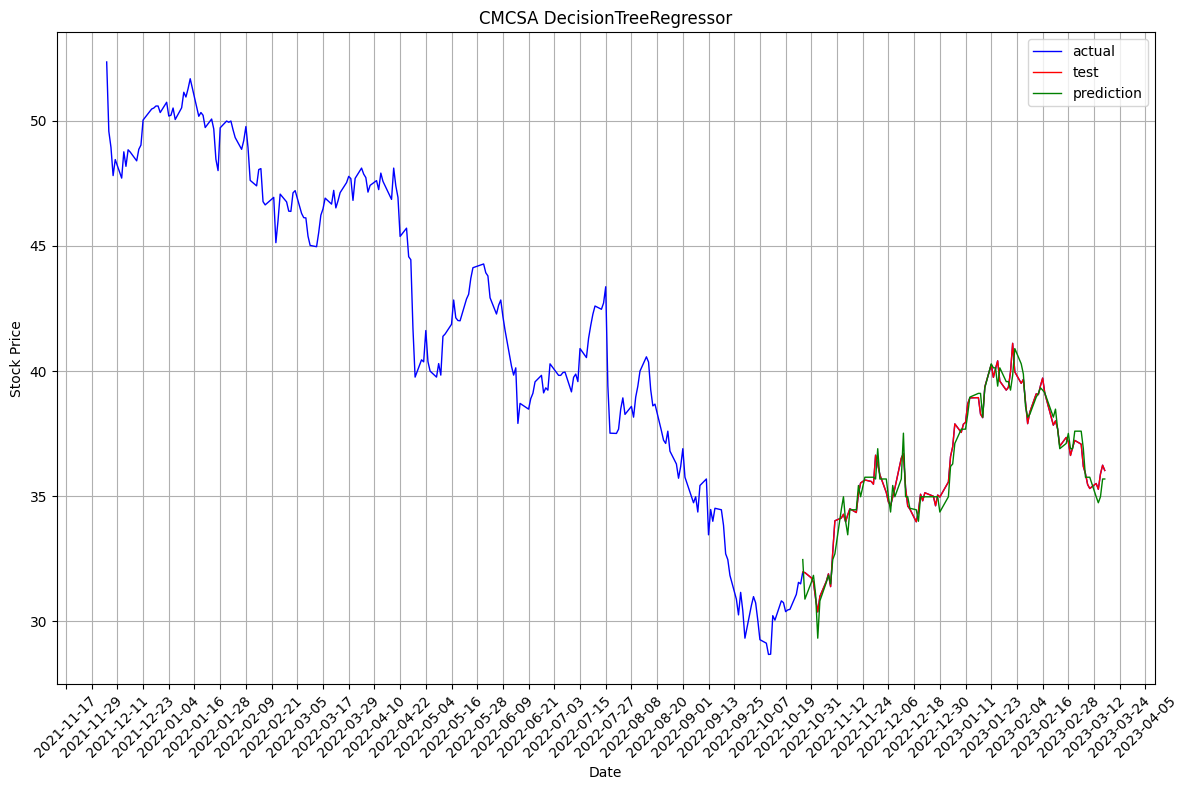

---- Model: CMCSA DecisionTreeRegressor ----
R2 Score                       0.9621674163533539
Max Error                      1.3200000000000003
Mean Absolute Error            0.37618556701030936
Mean Squared Error             0.23514123711340215
----------------------




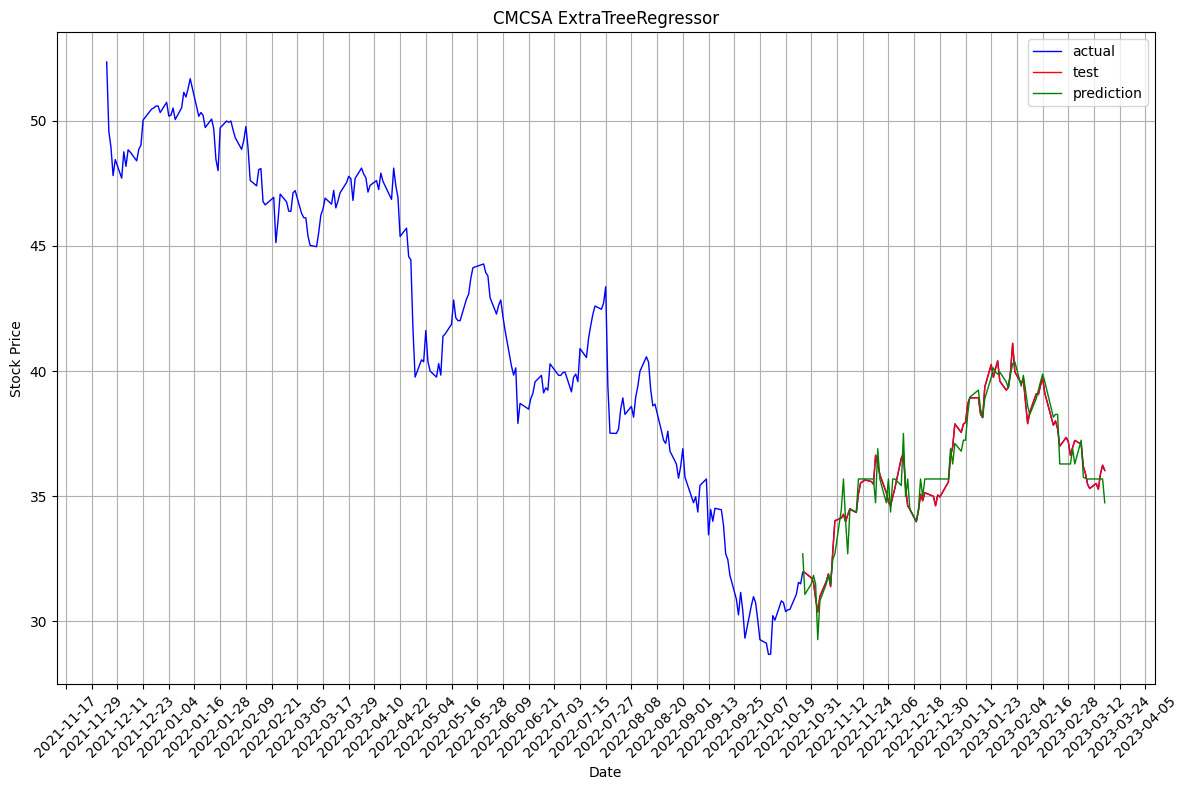

---- Model: CMCSA ExtraTreeRegressor ----
R2 Score                       0.9425494153352187
Max Error                      1.8999999999999986
Mean Absolute Error            0.4584536082474223
Mean Squared Error             0.35707319587628816
----------------------




In [156]:
# Predict Stock price with Tree Models

from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor

ticker_symbol = 'CMCSA'
candle_csv_file_path = './data/candlestick_data.csv'

all_stock_df = pd.read_csv(candle_csv_file_path, header = 0).sort_values(by=['unix_time'])

company_stock_data_df = all_stock_df[all_stock_df['symbol'] == ticker_symbol].copy()

company_stock_data_df['date'] = pd.to_datetime(company_stock_data_df['date'])
company_stock_data_df.index = company_stock_data_df['date']

stock_analysis_data_df = company_stock_data_df.drop(['date','symbol','unix_time'], axis=1)

data_x = stock_analysis_data_df.loc[:,stock_analysis_data_df.columns != 'close' ]
data_y = stock_analysis_data_df['close']

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, shuffle=False, random_state=1)

tree_models = [DecisionTreeRegressor(), ExtraTreeRegressor()]

for model in tree_models:
    trained_model = model.fit(x_train, y_train)
    prediction = trained_model.predict(x_test)
    model_title = ticker_symbol + " " + str(model)[:-2]

    plot_graph(company_stock_data_df, x_test, y_test, prediction, model_title)
    calculate_metrics(y_test, prediction, model_title)


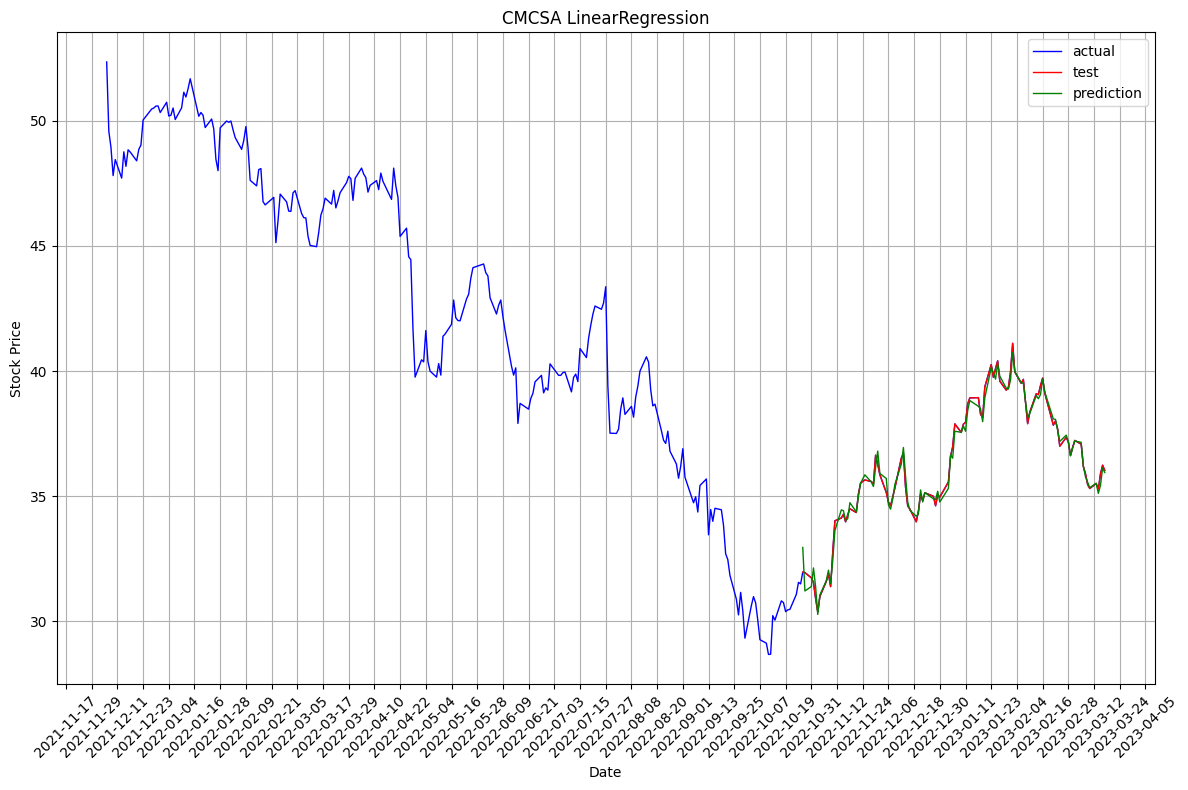

---- Model: CMCSA LinearRegression ----
R2 Score                       0.9894484404953375
Max Error                      0.9840373791752342
Mean Absolute Error            0.18671180791108763
Mean Squared Error             0.06558121376471084
----------------------




In [157]:
# Predict Stock price with Linear Models

from sklearn.linear_model import LinearRegression

ticker_symbol = 'CMCSA'
candle_csv_file_path = './data/candlestick_data.csv'

all_stock_df = pd.read_csv(candle_csv_file_path, header = 0).sort_values(by=['unix_time'])

company_stock_data_df = all_stock_df[all_stock_df['symbol'] == ticker_symbol].copy()

company_stock_data_df['date'] = pd.to_datetime(company_stock_data_df['date'])
company_stock_data_df.index = company_stock_data_df['date']

stock_analysis_data_df = company_stock_data_df.drop(['date','symbol'], axis=1)

data_x = stock_analysis_data_df.loc[:,stock_analysis_data_df.columns != 'close']
data_y = stock_analysis_data_df['close']

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, shuffle=False, random_state=1)

linear_model = LinearRegression()

trained_model = linear_model.fit(x_train, y_train)
prediction = trained_model.predict(x_test)

model_title = ticker_symbol + " " + str(linear_model)[:-2]

plot_graph(company_stock_data_df, x_test, y_test, prediction, model_title)
calculate_metrics(y_test, prediction, model_title)
